In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Shark Tank India.csv'  # (already extracted)
df = pd.read_csv(file_path)
print(df)

     Season Number      Startup Name  Episode Number  Pitch Number  \
0                1     BluePineFoods               1             1   
1                1      BoozScooters               1             2   
2                1  HeartUpMySleeves               1             3   
3                1         TagzFoods               2             4   
4                1      HeadAndHeart               2             5   
..             ...               ...             ...           ...   
629              4             Ecoil              51           630   
630              4          Rescript              51           631   
631              4     TickleYourArt              52           632   
632              4         Symbionic              52           633   
633              4          XLCinema              52           634   

    Season Start Season End Original Air Date                Episode Title  \
0      20-Dec-21   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer   
1  

In [3]:
print(df.shape)
print(df.head(10))
print(df.info())


(634, 80)
   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   
5              1       Agritourism               2             6    20-Dec-21   
6              1        qZenseLabs               3             7    20-Dec-21   
7              1         Peeschute               3             8    20-Dec-21   
8              1              NOCD               3             9    20-Dec-21   
9              1             CosIQ               4            10    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22      

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Key columns we'll use
key_columns = ['startup_name', 'industry', 'deal_amount', 'invested_guest_name', 'deal_status']

In [5]:
print (key_columns)

['startup_name', 'industry', 'deal_amount', 'invested_guest_name', 'deal_status']


In [6]:
if 'deal_amount' not in df.columns:
    print("Available columns:", df.columns)


Available columns: Index(['season_number', 'startup_name', 'episode_number', 'pitch_number',
       'season_start', 'season_end', 'original_air_date', 'episode_title',
       'anchor', 'industry', 'business_description', 'company_website',
       'started_in', 'number_of_presenters', 'male_presenters',
       'female_presenters', 'transgender_presenters', 'couple_presenters',
       'pitchers_average_age', 'pitchers_city', 'pitchers_state',
       'yearly_revenue', 'monthly_sales', 'gross_margin', 'net_margin',
       'ebitda', 'cash_burn', 'skus', 'has_patents', 'bootstrapped',
       'part_of_match_off', 'original_ask_amount', 'original_offered_equity',
       'valuation_requested', 'received_offer', 'accepted_offer',
       'total_deal_amount', 'total_deal_equity', 'total_deal_debt',
       'debt_interest', 'deal_valuation', 'number_of_sharks_in_deal',
       'deal_has_conditions', 'royalty_percentage', 'royalty_recouped_amount',
       'advisory_shares_equity', 'namita_investment_a

In [13]:
required_columns = ['startup_name', 'industry', 'amount_invested_(in_lakhs)']
print("Available Columns:", df.columns)


Available Columns: Index(['season_number', 'startup_name', 'episode_number', 'pitch_number',
       'season_start', 'season_end', 'original_air_date', 'episode_title',
       'anchor', 'industry', 'business_description', 'company_website',
       'started_in', 'number_of_presenters', 'male_presenters',
       'female_presenters', 'transgender_presenters', 'couple_presenters',
       'pitchers_average_age', 'pitchers_city', 'pitchers_state',
       'yearly_revenue', 'monthly_sales', 'gross_margin', 'net_margin',
       'ebitda', 'cash_burn', 'skus', 'has_patents', 'bootstrapped',
       'part_of_match_off', 'original_ask_amount', 'original_offered_equity',
       'valuation_requested', 'received_offer', 'accepted_offer',
       'total_deal_amount', 'total_deal_equity', 'total_deal_debt',
       'debt_interest', 'deal_valuation', 'number_of_sharks_in_deal',
       'deal_has_conditions', 'royalty_percentage', 'royalty_recouped_amount',
       'advisory_shares_equity', 'namita_investment_a

In [14]:
if 'amount_invested_(in_lakhs)' not in df.columns:
    print("Column 'amount_invested_(in_lakhs)' not found. Please check column name.")
    print("Available columns:", df.columns)

Column 'amount_invested_(in_lakhs)' not found. Please check column name.
Available columns: Index(['season_number', 'startup_name', 'episode_number', 'pitch_number',
       'season_start', 'season_end', 'original_air_date', 'episode_title',
       'anchor', 'industry', 'business_description', 'company_website',
       'started_in', 'number_of_presenters', 'male_presenters',
       'female_presenters', 'transgender_presenters', 'couple_presenters',
       'pitchers_average_age', 'pitchers_city', 'pitchers_state',
       'yearly_revenue', 'monthly_sales', 'gross_margin', 'net_margin',
       'ebitda', 'cash_burn', 'skus', 'has_patents', 'bootstrapped',
       'part_of_match_off', 'original_ask_amount', 'original_offered_equity',
       'valuation_requested', 'received_offer', 'accepted_offer',
       'total_deal_amount', 'total_deal_equity', 'total_deal_debt',
       'debt_interest', 'deal_valuation', 'number_of_sharks_in_deal',
       'deal_has_conditions', 'royalty_percentage', 'royalt

In [18]:
df['industry'] = df['industry'].fillna('Unknown')
print(df)


     season_number      startup_name  episode_number  pitch_number  \
0                1     BluePineFoods               1             1   
1                1      BoozScooters               1             2   
2                1  HeartUpMySleeves               1             3   
3                1         TagzFoods               2             4   
4                1      HeadAndHeart               2             5   
..             ...               ...             ...           ...   
629              4             Ecoil              51           630   
630              4          Rescript              51           631   
631              4     TickleYourArt              52           632   
632              4         Symbionic              52           633   
633              4          XLCinema              52           634   

    season_start season_end original_air_date                episode_title  \
0      20-Dec-21   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer   
1  

In [20]:
# 7. Check if 'funding_amount' exists and fill NaN values
if 'funding_amount' in df.columns:
    df['funding_amount'] = df['funding_amount'].fillna(0)  # Replace NaN with 0
    print("NaN values in 'funding_amount' replaced with 0.")
else:
    print("Error: 'funding_amount' column not found!")

Error: 'funding_amount' column not found!


In [22]:
df['industry'] = df['industry'].fillna('Unknown')  # Fill missing industries
print(df)

     season_number      startup_name  episode_number  pitch_number  \
0                1     BluePineFoods               1             1   
1                1      BoozScooters               1             2   
2                1  HeartUpMySleeves               1             3   
3                1         TagzFoods               2             4   
4                1      HeadAndHeart               2             5   
..             ...               ...             ...           ...   
629              4             Ecoil              51           630   
630              4          Rescript              51           631   
631              4     TickleYourArt              52           632   
632              4         Symbionic              52           633   
633              4          XLCinema              52           634   

    season_start season_end original_air_date                episode_title  \
0      20-Dec-21   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer   
1  

In [25]:
# after standardizing df.columns as before…

# 1. Convert the existing guest_investment_amount to numeric
df['funding_amount'] = pd.to_numeric(df['guest_investment_amount'], errors='coerce')

# 2. Fill any NaN with 0
df['funding_amount'] = df['funding_amount'].fillna(0)


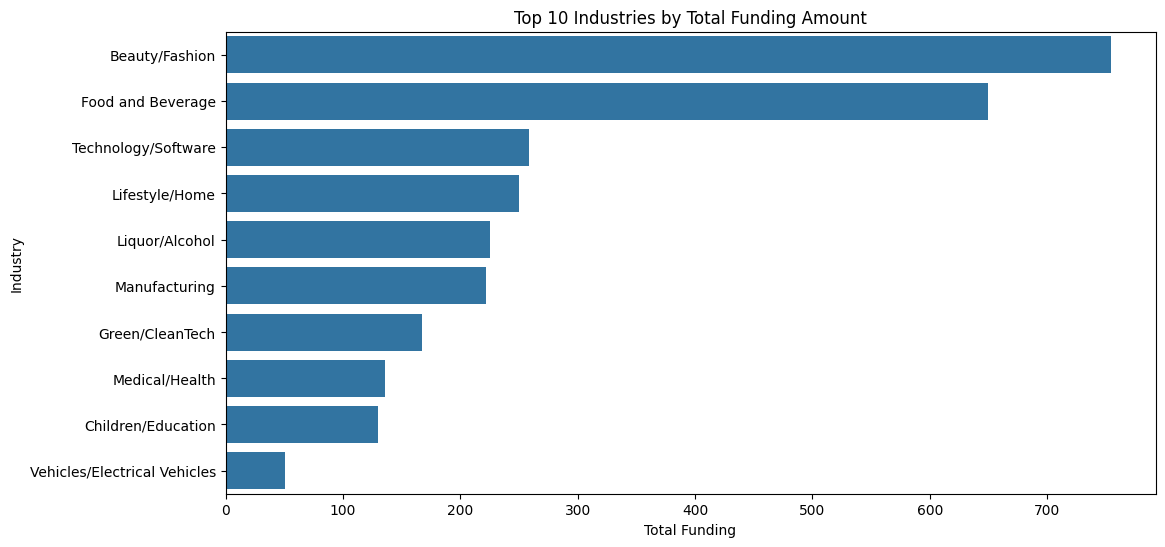

In [26]:
# fill missing industries
df['industry'] = df['industry'].fillna('Unknown')

# now group and plot
industry_funding = df.groupby('industry')['funding_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_funding.values[:10], 
            y=industry_funding.index[:10])
plt.title('Top 10 Industries by Total Funding Amount')
plt.xlabel('Total Funding')
plt.ylabel('Industry')
plt.show()


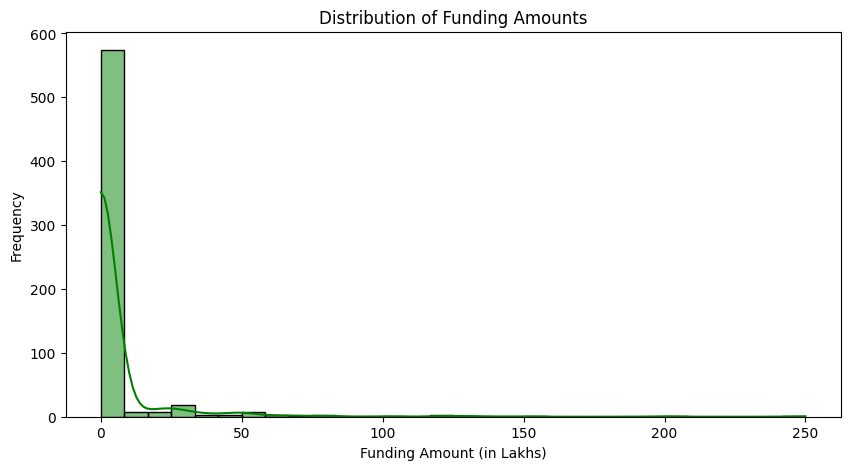

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['funding_amount'], bins=30, kde=True, color='green')
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

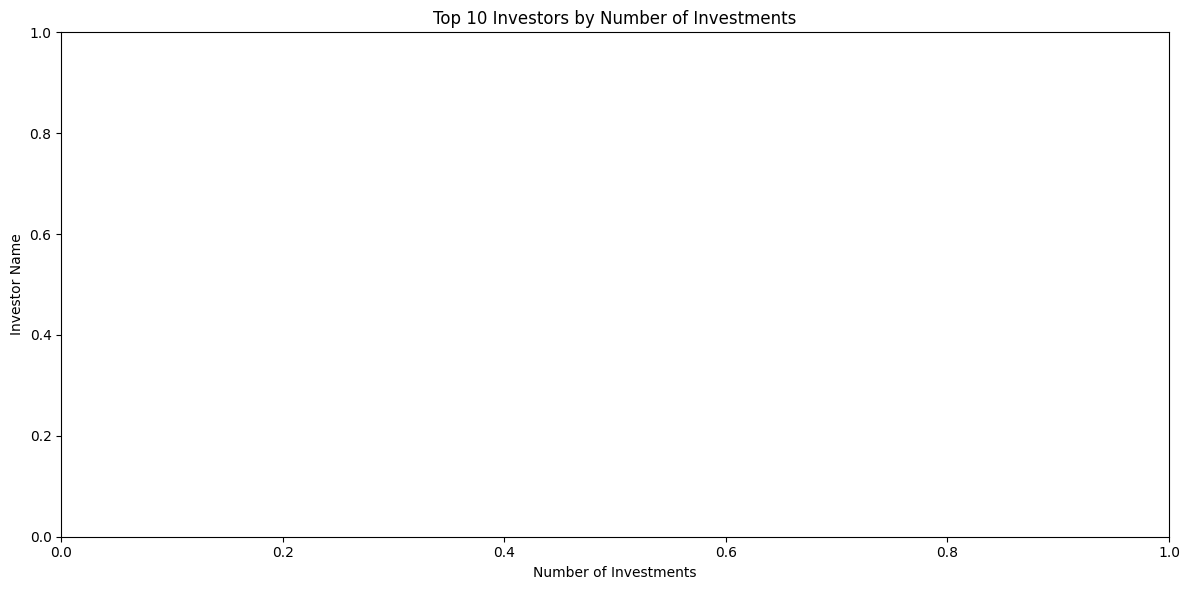

In [32]:
top10 = investor_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Investors by Number of Investments')
plt.xlabel('Number of Investments')
plt.ylabel('Investor Name')
plt.tight_layout()
plt.show()
